In [1]:
# paths
PWD = "/media/hanchau/New Volume/proj/ds"
DATA = "data/titanic/"
d_path, d_eval_path = DATA + "train.csv", DATA + "test.csv"
import os; os.chdir(PWD)


# Basic Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import *

# utils
def load_data(path):
    return pd.read_csv(path)

def drop_un(df, cols):
    try: return df.drop(cols, axis=1)
    except: return df.drop(cols[-1], axis=1)

def check_nan(df, col):
    return df[col].isnull().values.sum()

def make_cat(df, col, bins, labels):
    df[col] = pd.cut(df[col], bins=bins, labels=labels)

def check_counts(df, col):
    return pd.DataFrame(df[col].value_counts())

def fill_na(df, col, type='mode'):
    if type=='mode':
        return df.fillna({col : df[col].mode()[0]})
    elif type=='mean':
        return df.fillna({col : df[col].mean()[0]})

def plot_dist(df, col):
    sns.distplot(df[col])

In [2]:
# DATA loading
data = pd.read_csv(d_path) 

In [3]:
# EDA & Cleaning
# data.info()

# Study the Columns/Data
data[['Ticket', 'PassengerId', 'Cabin', 'Parch']].head(2)

# data['Cabin'].unique()

,Ticket,PassengerId,Cabin,Parch
0,A/5 21171,1,NaN,0
1,PC 17599,2,C85,0


In [4]:
# Dropping the Unnecessary Columns
cols = ['Name', 'PassengerId', 'Ticket', 'Cabin']
data_1 = data.drop(cols, axis=1)

In [5]:
data_1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Grouping the Columns in Custom Groups for Logistic Regression
# Age
check_nan(data_1, 'Age')
make_cat(data_1, 'Age', 
    [0, 5, 17, 25, 50, 80], 
    ['infant', 'kid', 'young', 'adult', 'old']
)

In [7]:
print(pd.DataFrame(check_counts(data_1, 'Age')))
print('Mode of column is --', data_1['Age'].mode()[0])
data_2 = fill_na(data_1, 'Age', type='mode')
check_nan(data_2, 'Age')

        Age
adult   349
young   188
kid      69
old      64
infant   44
Mode of column is -- adult


0

In [8]:
#  SibSp
check_nan(data_2, 'SibSp')
make_cat(data_2, 'SibSp', 
    [-1, 0, 1, 2, 4, 6, 8], 
    ['0', '1', '2', '4', '6', '8']
)
print(pd.DataFrame(check_counts(data_2, 'SibSp')))
print('Mode of column is --', data_1['Age'].mode()[0])

   SibSp
0    608
1    209
4     34
2     28
8      7
6      5
Mode of column is -- adult


In [9]:
#  Parch
check_nan(data_2, 'Parch')
make_cat(data_2, 'Parch', 
    [-1, 0, 1, 2, 4, 6], 
    ['0', '1', '2', '4', '6']
)
print(pd.DataFrame(check_counts(data_2, 'Parch')))
print('Mode of column is --', data_1['Parch'].mode()[0])

   Parch
0    678
1    118
2     80
4      9
6      6
Mode of column is -- 0


In [10]:
# Fare
make_cat(data_2, 'Fare', 
    [0, 10, 20, 40, 80, 160, 560], 
    ['low', 'low-med', 'med', 'med-high', 'high', 'very-high']
)
print(pd.DataFrame(check_counts(data_2, 'Fare')))
print('Mode of column is --', data_2['Fare'].mode()[0])

           Fare
low         321
med         200
low-med     179
med-high    102
high         52
very-high    22
Mode of column is -- low


In [11]:
# Fare
make_cat(data_2, 'Pclass', 
    [0, 1, 2, 3, 4], 
    ['low', 'middle', 'upper-mid', 'high']
)
print(pd.DataFrame(check_counts(data_2, 'Pclass')))
print('Mode of column is --', data_2['Pclass'].mode()[0])

           Pclass
upper-mid     491
low           216
middle        184
high            0
Mode of column is -- upper-mid


/media/hanchau/New Volume/proj/ds/skl/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

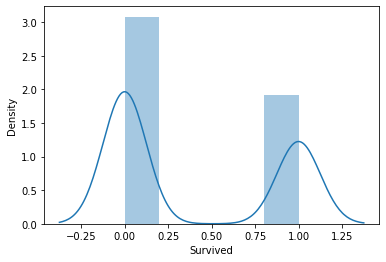

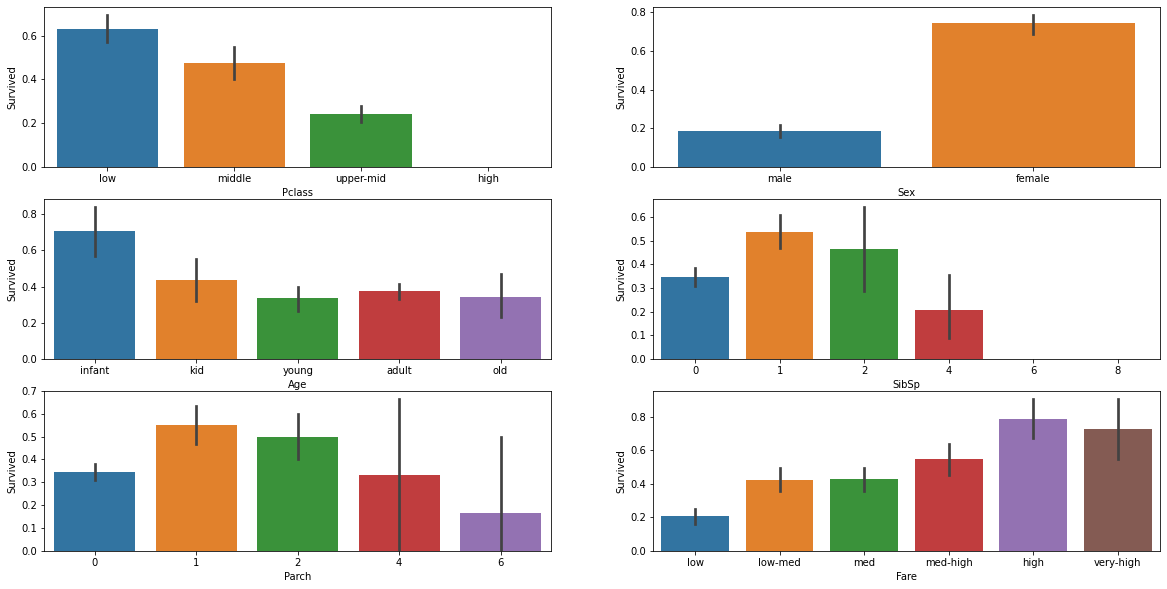

In [12]:
plot_dist(data_2, 'Survived')

plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'Pclass', y = 'Survived', data = data_2)
plt.subplot(322)
sns.barplot(x = 'Sex', y = 'Survived', data = data_2)
plt.subplot(323)
sns.barplot(x = 'Age', y = 'Survived', data = data_2)
plt.subplot(324)
sns.barplot(x = 'SibSp', y = 'Survived', data = data_2)
plt.subplot(325)
sns.barplot(x = 'Parch', y = 'Survived', data = data_2)
plt.subplot(326)
sns.barplot(x = 'Fare', y = 'Survived', data = data_2)
# plt.subplot(327)
# sns.barplot(x = 'Embarked', y = 'Survived', data = data_2)


In [13]:
# Encoding the Data
dummies = ['Fare', 'Age', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Pclass']
dummy_data = pd.get_dummies(data_2[dummies])


In [14]:
data_3 = pd.concat([data_2, dummy_data], axis = 1)
data_3.drop(dummies, axis=1, inplace=True)
data_3

,Survived,Fare_low,Fare_low-med,Fare_med,Fare_med-high,Fare_high,Fare_very-high,Age_infant,Age_kid,Age_young,...,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_4,Parch_6,Pclass_low,Pclass_middle,Pclass_upper-mid,Pclass_high
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
887,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
888,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
889,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [49]:
# Training Preparation

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split( 
    data_3.drop('Survived', axis=1), data_3['Survived'], test_size=0.33
)
#  Training
for nb in [GaussianNB, BernoulliNB , MultinomialNB, CategoricalNB, ComplementNB]:
    model = nb()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(nb.__name__)
    print(confusion_matrix(y_test, y_pred))
    print('Accuracy - ', accuracy_score(y_test, y_pred))

GaussianNB
[[ 10 170]
 [  2 113]]
Accuracy -  0.41694915254237286
BernoulliNB
[[149  31]
 [ 25  90]]
Accuracy -  0.8101694915254237
MultinomialNB
[[156  24]
 [ 34  81]]
Accuracy -  0.8033898305084746
CategoricalNB
[[149  31]
 [ 25  90]]
Accuracy -  0.8101694915254237
ComplementNB
[[150  30]
 [ 29  86]]
Accuracy -  0.8
